In [1]:
#Topic: Environment and Energy (Maven Analytics' dataset: Apple Emissions)
import warnings

import pandas as pd
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
#reading datasets
carbon_footprint_by_product = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/carbon_footprint_by_product.csv')
greenhouse_gas_emissions = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/greenhouse_gas_emissions.csv')
normalizing_factors = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/normalizing_factors.csv')
#csv on what variables mean (readme basically):
variable_understanding = pd.read_csv('https://raw.githubusercontent.com/corinne167225/DataAnalysis2/main/Final_Project/data_dictionary.csv')

In [3]:
#Table describing variables for each of the three tables
variable_understanding

,Table,Field,Description
0,Greenhouse gas emissions,Fiscal Year,Apple's fiscal calendar starts on the last Sun...
1,Greenhouse gas emissions,Category,Emissions are divided into two categories: cor...
2,Greenhouse gas emissions,Type,There are two types of emissions data included...
3,Greenhouse gas emissions,Scope,There are three scopes: direct scope 1 emissio...
4,Greenhouse gas emissions,Description,The source of the greenhouse gas emissions
5,Greenhouse gas emissions,Emissions,Greenhouse gas emissions (metric tons CO2e)
6,Carbon footprint by product,Release Year,Year the product was released
7,Carbon footprint by product,Product,Product name
8,Carbon footprint by product,Baseline Storage,Lowest storage option
9,Carbon footprint by product,Carbon Footprint,Greenhouse gas emissions from the product lige...


In [4]:
variable_understanding.iloc[1].loc['Description']

'Emissions are divided into two categories: corporate emissions and product life cycle emissions'

In [5]:
carbon_footprint_by_product.rename(columns = {'Release Year':'Fiscal_Year'}, inplace = True)
carbon_footprint_by_product

,Fiscal_Year,Product,Baseline Storage,Carbon Footprint
0,2023,iPhone 15,128,56
1,2022,iPhone 14,128,61
2,2021,iPhone 13,128,64
3,2020,iPhone 12,64,70
4,2019,iPhone 11,64,72
5,2018,iPhone Xs,64,70
6,2017,iPhone X,64,79
7,2017,iPhone 8,64,57
8,2016,iPhone 7,32,56
9,2015,iPhone 6s,32,54


In [6]:
greenhouse_gas_emissions

,Fiscal Year,Category,Type,Scope,Description,Emissions
0,2022,Corporate emissions,Gross emissions,Scope 1,"Natural gas, diesel, propane",39700.0
1,2022,Corporate emissions,Gross emissions,Scope 1,Fleet vehicles,12600.0
2,2022,Corporate emissions,Gross emissions,Scope 1,Other (R&D processes & refrigerant leaks),2900.0
3,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),Electricity,0.0
4,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),"Steam, heating, and cooling",3000.0
...,...,...,...,...,...,...
131,2015,Product life cycle emissions,Gross emissions,Scope 3,Manufacturing (purchased goods and services),29600000.0
132,2015,Product life cycle emissions,Gross emissions,Scope 3,Product transportation (upstream and downstream),1300000.0
133,2015,Product life cycle emissions,Gross emissions,Scope 3,Product use (use of sold products),6600000.0
134,2015,Product life cycle emissions,Gross emissions,Scope 3,End-of-life processing,500000.0


In [7]:
normalizing_factors

,Fiscal Year,Revenue,Market Capitalization,Employees
0,2022,394328,2490,164000
1,2021,365817,2450,154000
2,2020,274515,1720,147000
3,2019,260174,1090,137000
4,2018,265595,830,132000
5,2017,229234,740,123000
6,2016,215639,600,116000
7,2015,233715,580,110000


In [8]:
#Question: How do emissions relate to revenue by year? (will have to group fiscal year 
#in greenhouse gas table and get sum of emissions) ***Better: is there a CORRELATION between emissions produced by Apple and revenue

##i don't know if correlation is way to go if i also want to do regressions???
#expected a link b/n revenue and emissions b/c more emissions probably means more product??

#could do a scatterplot based on that!
#could maybe even do a graph where y is years and shows graph trends (like small multiples charts)

# Y:revenue, x:emissions, z:MARKET CAPITALIZATION (more money the company is worth, the more attention it gets- leads to wanting to obe greener??? carbon footprint, emission type (category) = 
#could make that a dummy variable for corporate emissions = 1

In [9]:
#merge greenhouse_gas_emissions df and normalizing_factors df:
merged_df = pd.merge(greenhouse_gas_emissions, normalizing_factors, on = 'Fiscal Year')
merged_df

,Fiscal Year,Category,Type,Scope,Description,Emissions,Revenue,Market Capitalization,Employees
0,2022,Corporate emissions,Gross emissions,Scope 1,"Natural gas, diesel, propane",39700.0,394328,2490,164000
1,2022,Corporate emissions,Gross emissions,Scope 1,Fleet vehicles,12600.0,394328,2490,164000
2,2022,Corporate emissions,Gross emissions,Scope 1,Other (R&D processes & refrigerant leaks),2900.0,394328,2490,164000
3,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),Electricity,0.0,394328,2490,164000
4,2022,Corporate emissions,Gross emissions,Scope 2 (market-based),"Steam, heating, and cooling",3000.0,394328,2490,164000
...,...,...,...,...,...,...,...,...,...
131,2015,Product life cycle emissions,Gross emissions,Scope 3,Manufacturing (purchased goods and services),29600000.0,233715,580,110000
132,2015,Product life cycle emissions,Gross emissions,Scope 3,Product transportation (upstream and downstream),1300000.0,233715,580,110000
133,2015,Product life cycle emissions,Gross emissions,Scope 3,Product use (use of sold products),6600000.0,233715,580,110000
134,2015,Product life cycle emissions,Gross emissions,Scope 3,End-of-life processing,500000.0,233715,580,110000


In [10]:
merged_df.rename(columns =
                {'Market Capitalization':'Market_Capitalization',
                'Fiscal Year': 'Fiscal_Year'}, inplace = True)
##remember to dropna() for important variables
merged_df['Corporate_Emissions'] = (merged_df['Category'] == 'Corporate emissions').astype(int)
merged_df = merged_df.dropna(subset=['Category'])
merged_df['Product_LifeCy_Emissions'] = (merged_df['Category'] == 'Product life cycle emissions').astype(int)
merged_df = pd.merge(carbon_footprint_by_product, merged_df, on ='Fiscal_Year')
merged_df

,Fiscal_Year,Product,Baseline Storage,Carbon Footprint,Category,Type,Scope,Description,Emissions,Revenue,Market_Capitalization,Employees,Corporate_Emissions,Product_LifeCy_Emissions
0,2022,iPhone 14,128,61,Corporate emissions,Gross emissions,Scope 1,"Natural gas, diesel, propane",39700.0,394328,2490,164000,1,0
1,2022,iPhone 14,128,61,Corporate emissions,Gross emissions,Scope 1,Fleet vehicles,12600.0,394328,2490,164000,1,0
2,2022,iPhone 14,128,61,Corporate emissions,Gross emissions,Scope 1,Other (R&D processes & refrigerant leaks),2900.0,394328,2490,164000,1,0
3,2022,iPhone 14,128,61,Corporate emissions,Gross emissions,Scope 2 (market-based),Electricity,0.0,394328,2490,164000,1,0
4,2022,iPhone 14,128,61,Corporate emissions,Gross emissions,Scope 2 (market-based),"Steam, heating, and cooling",3000.0,394328,2490,164000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2015,iPhone 6s,32,54,Product life cycle emissions,Gross emissions,Scope 3,Manufacturing (purchased goods and services),29600000.0,233715,580,110000,0,1
149,2015,iPhone 6s,32,54,Product life cycle emissions,Gross emissions,Scope 3,Product transportation (upstream and downstream),1300000.0,233715,580,110000,0,1
150,2015,iPhone 6s,32,54,Product life cycle emissions,Gross emissions,Scope 3,Product use (use of sold products),6600000.0,233715,580,110000,0,1
151,2015,iPhone 6s,32,54,Product life cycle emissions,Gross emissions,Scope 3,End-of-life processing,500000.0,233715,580,110000,0,1


In [11]:
year_emissions_revenue = merged_df[['Fiscal_Year','Emissions','Revenue']]
year_emissions_revenue

,Fiscal_Year,Emissions,Revenue
0,2022,39700.0,394328
1,2022,12600.0,394328
2,2022,2900.0,394328
3,2022,0.0,394328
4,2022,3000.0,394328
...,...,...,...
148,2015,29600000.0,233715
149,2015,1300000.0,233715
150,2015,6600000.0,233715
151,2015,500000.0,233715


In [12]:
#simply taking a look at the scatterplot...then regression...then will add in possible omitted variables
year_revenue_emissions = year_emissions_revenue.groupby(by = ['Fiscal_Year', "Revenue"], dropna = True)['Emissions'].sum().reset_index()
year_revenue_emissions

,Fiscal_Year,Revenue,Emissions
0,2015,233715,38383470.0
1,2016,215639,29579370.0
2,2017,229234,54832600.0
3,2018,265595,25136170.0
4,2019,260174,25033730.0
5,2020,274515,22524440.0
6,2021,365817,22519400.0
7,2022,394328,20279900.0


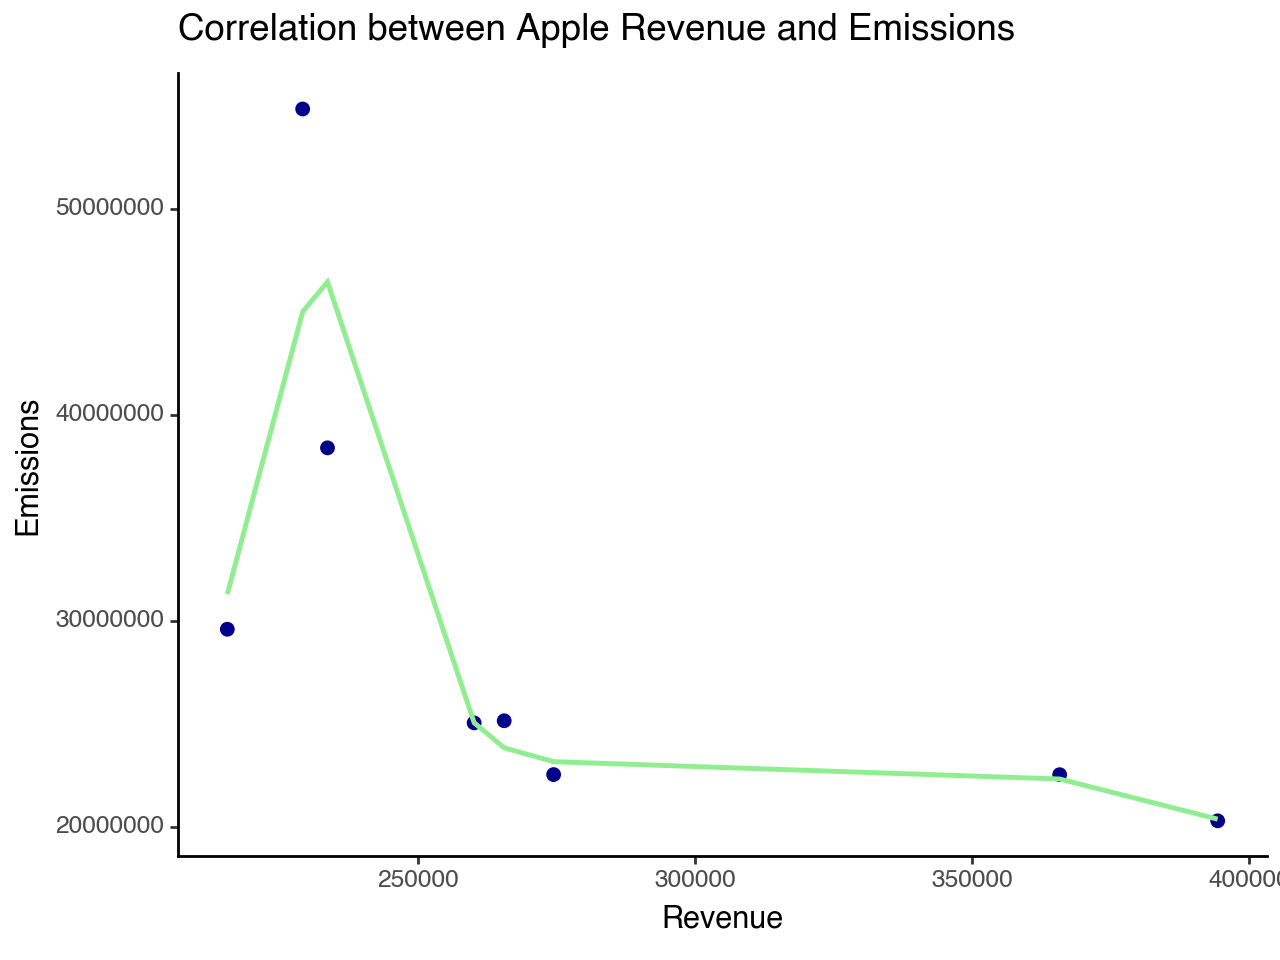

<Figure Size: (640 x 480)>

In [13]:
#Scatter Plot- fiscal year
(ggplot(year_revenue_emissions, aes(x='Revenue', y='Emissions')) +
 geom_point(size=2, color='darkblue') +
 geom_smooth(method='loess', color='lightgreen', se=False) +  # Add LOESS line
 theme_classic() + labs(x='Revenue', y='Emissions', title='Correlation between Apple Revenue and Emissions'))

#looks like a quadratic (positive relationship between revenue and emissions and negative correlation)???
#light blue line shows the general trend

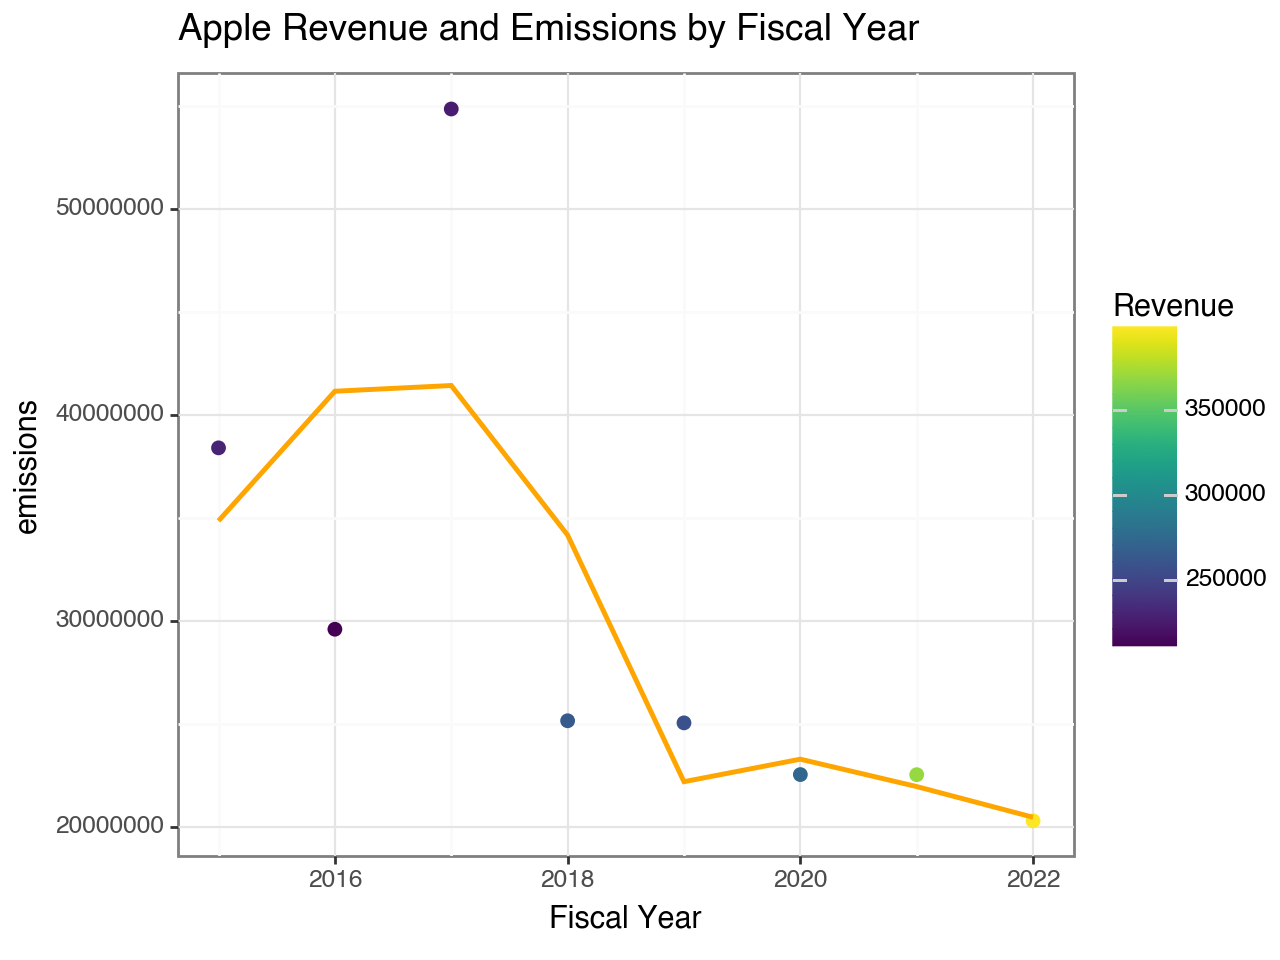

<Figure Size: (640 x 480)>

In [14]:

(ggplot(year_revenue_emissions, aes(x = 'Fiscal_Year', y = 'Emissions', color = 'Revenue')) 
+ geom_point(size = 2)
+ geom_smooth(method='loess', color='orange', se=False)
+ theme_bw()
+ labs (x = 'Fiscal Year', y = 'emissions', 
        title = 'Apple Revenue and Emissions by Fiscal Year'))
#as fiscal year increases, revenue increases, however emissions decrease

In [15]:
#do a regression of revenue on emissions to see if it's statistically significant = 
#NOT STATIsTICALLY SIGNIFICANT *sad face*
reg1 = smf.ols(formula="Emissions~Revenue", data=merged_df).fit(cov_type = 'HC1')
reg1.summary()
#For the variable with a large p-value, you do not have enough evidence to claim 
#a statistically significant relationship with the dependent variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.828
Date:                Mon, 04 Dec 2023   Prob (F-statistic):              0.179
Time:                        20:22:27   Log-Likelihood:                -2012.4
No. Observations:                 119   AIC:                             4029.
Df Residuals:                     117   BIC:                             4034.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.854e+06   2.39e+06      2.032      0.042    1.72e+05    9.54e+06
Revenue       -9.9823      7.384     -1.352      0.176     -24.454       4.490
==============================================================================
Omnibus:                      100.250   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.693
Skew:                           3.137   Prob(JB):                    8.23e-137
Kurtosis:                      12.328   Cond. No.                     1.38e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:

#does revenue have a significant relationship with more than one variable and that's why it shows 
#not significant with emissions alone? lurking variables?

In [17]:
reg2 = smf.ols(formula="Emissions~Revenue+Corporate_Emissions", data=merged_df).fit(cov_type = 'HC1')
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.96e-05
Time:                        20:22:27   Log-Likelihood:                -1995.4
No. Observations:                 119   AIC:                             3997.
Df Residuals:                     116   BIC:                             4005.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.565e+06   2.48e+06      3.052      0.002    2.71e+06    1.24e+07
Revenue                -6.5424      6.102     -1.072      0.284     -18.503       5.418
Corporate_Emissions -5.635e+06   1.22e+06     -4.608      0.000   -8.03e+06   -3.24e+06
==============================================================================
Omnibus:                       80.404   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              414.031
Skew:                           2.404   Prob(JB):                     1.24e-90
Kurtosis:                      10.771   Cond. No.                     1.42e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 1.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
reg3 = smf.ols(formula="Emissions~Revenue+Corporate_Emissions+Market_Capitalization", data=merged_df).fit(cov_type = 'HC1')
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     7.195
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000181
Time:                        20:22:27   Log-Likelihood:                -1995.3
No. Observations:                 119   AIC:                             3999.
Df Residuals:                     115   BIC:                             4010.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.234e+06   3.49e+06      1.786      0.074   -6.07e+05    1.31e+07
Revenue                   1.4871     18.597      0.080      0.936     -34.962      37.936
Corporate_Emissions   -5.631e+06   1.23e+06     -4.595      0.000   -8.03e+06   -3.23e+06
Market_Capitalization  -695.9792   1638.107     -0.425      0.671   -3906.610    2514.652
==============================================================================
Omnibus:                       79.851   Durbin-Watson:                   2.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              405.044
Skew:                           2.391   Prob(JB):                     1.11e-88
Kurtosis:                      10.670   Cond. No.                     2.83e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 2.83e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
reg4 = smf.ols(formula="Emissions~Revenue+Corporate_Emissions+Market_Capitalization+Employees", data=merged_df).fit(cov_type = 'HC1')
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     5.429
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000488
Time:                        20:22:28   Log-Likelihood:                -1994.8
No. Observations:                 119   AIC:                             4000.
Df Residuals:                     114   BIC:                             4014.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.433e+07   1.11e+07      1.293      0.196   -7.39e+06     3.6e+07
Revenue                   4.5085     19.752      0.228      0.819     -34.206      43.222
Corporate_Emissions   -5.568e+06    1.2e+06     -4.628      0.000   -7.93e+06   -3.21e+06
Market_Capitalization   765.4440   2098.349      0.365      0.715   -3347.244    4878.132
Employees               -80.0218    103.987     -0.770      0.442    -283.833     123.789
==============================================================================
Omnibus:                       76.642   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.007
Skew:                           2.315   Prob(JB):                     4.94e-78
Kurtosis:                      10.096   Cond. No.                     7.11e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 7.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
reg5 = smf.ols(formula="Emissions~Corporate_Emissions", data=merged_df).fit(cov_type = 'HC1')
reg5.summary()
#emissionn here is actually interesting because corporoate_emissions = shows that more emissions
#are coming from product life cycle emissions (the products themselves) rather than the corporate's
#facilities, process of creation, etc!!!
#visualize this with line plot (y: emissions, x:corporate_emissions)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     20.88
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.22e-05
Time:                        20:27:14   Log-Likelihood:                -1995.8
No. Observations:                 119   AIC:                             3996.
Df Residuals:                     117   BIC:                             4001.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             5.74e+06   1.25e+06      4.599      0.000    3.29e+06    8.19e+06
Corporate_Emissions -5.703e+06   1.25e+06     -4.569      0.000   -8.15e+06   -3.26e+06
==============================================================================
Omnibus:                       82.751   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.253
Skew:                           2.466   Prob(JB):                     1.69e-98
Kurtosis:                      11.154   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [24]:
reg6 = smf.ols(formula="Emissions~Product_LifeCy_Emissions", data=merged_df).fit(cov_type = 'HC1')
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Emissions   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     20.88
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.22e-05
Time:                        20:27:16   Log-Likelihood:                -1995.8
No. Observations:                 119   AIC:                             3996.
Df Residuals:                     117   BIC:                             4001.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3.768e+04   1.01e+04      3.749      0.000     1.8e+04    5.74e+04
Product_LifeCy_Emissions  5.703e+06   1.25e+06      4.569      0.000    3.26e+06    8.15e+06
==============================================================================
Omnibus:                       82.751   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.253
Skew:                           2.466   Prob(JB):                     1.69e-98
Kurtosis:                      11.154   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [26]:
stargazer = Stargazer([reg5, reg6])
stargazer.covariate_order(["Intercept", 'Corporate_Emissions', "Product_LifeCy_Emissions"])
stargazer.rename_covariates({"Intercept": "Constant"})
stargazer